# A Bayesian model for a coin toss

**Goal:** In this notebook you will learn how you can calculate the postirior distribution for the parameter $\theta$ of a bernoulli experiment. You will use the brute force approach and assume a prior distribution for the parameter $\theta$. With the observed data of some coin tosses you will then calculate the likelihood under a specific $\theta$. After that, you will calculate the unormalized posterior under each $\theta$ (going for 0 to 1 by 0.05 steps) by multiplying the prior of the specific theta with the likelihood. Finally you will normalize the unormalized posterior so that the sum of the posterior distribution is one. To get the outcome distribution you will sum over all the multilication of every theta with the correspondig posterior value. 
Note that you will use discrete values for the prior and postirior of $\theta$ here but in theory they can take any value. You will work with sums in this notebook to approximate the integrals.

**Usage:** The idea of the notebook is that you try to understand the provided code by running it, checking the output and playing with it by slightly changing the code and rerunning it. You 

**Dataset:** You work with the observed values of coin tosses, 1 for head and 0 for tail

**Content:**
* Define a uniform prior for $\theta$
* Plot a random example of each class label
* Normalize the data to be in the range from -1 and 1
* Define and fit a Convolutional neural network without any dropout layers
* Define and fit a Convolutional neural network with dropout layers in the fully connected part
* Compare the loss and accuracy curves of the two models 

| [open in colab](https://colab.research.google.com/github/tensorchiefs/dl_book/blob/master/chapter_07/nb_ch07_03.ipynb)




In [1]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
      !pip install tensorflow-gpu==2.0.0
      !pip install tensorflow-probability==0.8.0
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0  running in colab?:  True


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

plt.style.use('default') 
%matplotlib inline

tfd = tfp.distributions
print("TF  Version",tf.__version__)
print("TFP Version", tfp.__version__)

TF  Version 2.0.0
TFP Version 0.8.0


In [0]:
obs_data=np.repeat(1,3)
theta=np.arange(0.05,1,0.05)

In [4]:
### ML
est_theta_ml=sum(obs_data)/len(obs_data)
print(est_theta_ml)
sd_est_theta_ml=np.std(obs_data, ddof=1)
print(sd_est_theta_ml)


1.0
0.0


In [5]:
theta
print(theta)
prior=1/len(theta) #uniformdisti
dist = tfp.distributions.Bernoulli(probs=0.5)#one spcific theta
print(np.prod(dist.prob(obs_data)))#joint likelyhood
print(np.prod(dist.prob(obs_data))*prior) #unnormalized posterior

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]
0.125
0.006578947368421052


In [6]:
np.prod(dist.prob(obs_data))*prior #unnormalized posterior

0.006578947368421052

In [0]:
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))

In [8]:
import pandas as pd
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])
RES

,theta,jointlik,prior,unnorm_post,post
0,0.05,0.000125,0.052632,0.000007,0.000028
1,0.10,0.001000,0.052632,0.000053,0.000222
2,0.15,0.003375,0.052632,0.000178,0.000748
3,0.20,0.008000,0.052632,0.000421,0.001773
4,0.25,0.015625,0.052632,0.000822,0.003463
5,0.30,0.027000,0.052632,0.001421,0.005983
6,0.35,0.042875,0.052632,0.002257,0.009501
7,0.40,0.064000,0.052632,0.003368,0.014183
8,0.45,0.091125,0.052632,0.004796,0.020194
9,0.50,0.125000,0.052632,0.006579,0.027701


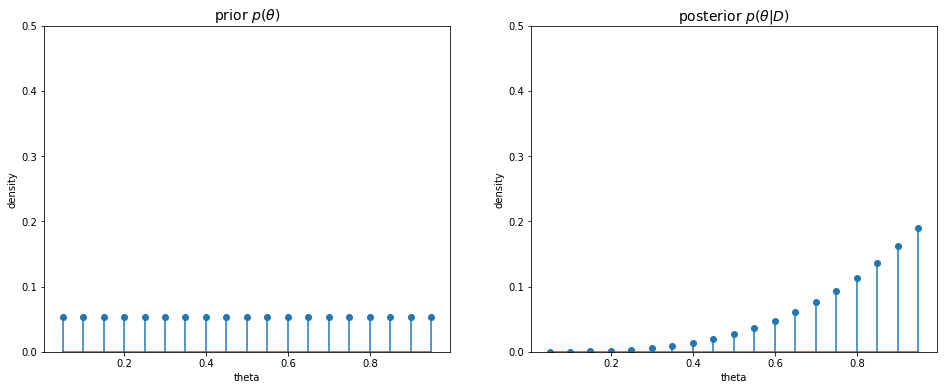

In [9]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["prior"])
plt.xlabel("theta")
plt.ylabel("density")
plt.ylim([0,0.5])
plt.title("prior " +r"$p(\theta)$",fontsize=14)
plt.subplot(1,2,2)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,0.5])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior " +r"$p(\theta|D)$",fontsize=14)
plt.show()

In [10]:
np.sum((1-RES["theta"])*RES["post"]) # genährtes integral für teta-1


0.22068421371448946

In [11]:
np.sum((RES["theta"])*RES["post"]) # genährtes integral

0.7793157862855107

In [12]:
np.sum((1-RES["theta"])*RES["prior"]) # genährtes integral für teta-1

0.49999999999999994

In [13]:
np.sum((RES["theta"])*RES["prior"]) # genährtes integral für teta

0.5

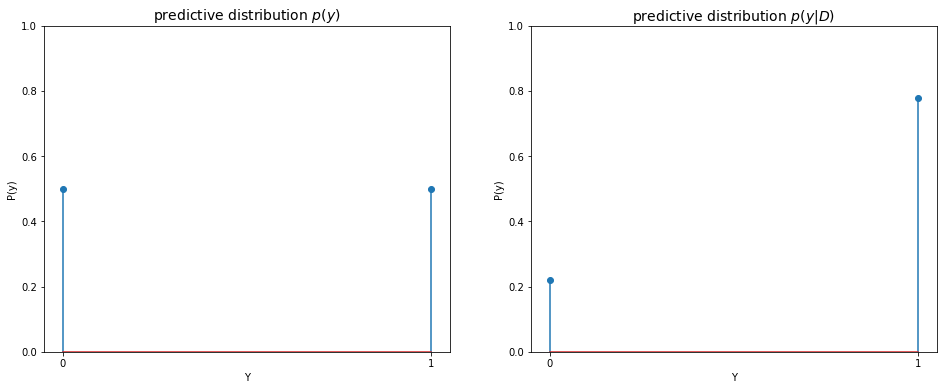

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("predictive distribution " +r"$p(y)$",fontsize=14)
plt.xticks([0,1]) 
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("predictive distribution " +r"$p(y|D)$",fontsize=14)
plt.xticks([0,1]) 
plt.show()

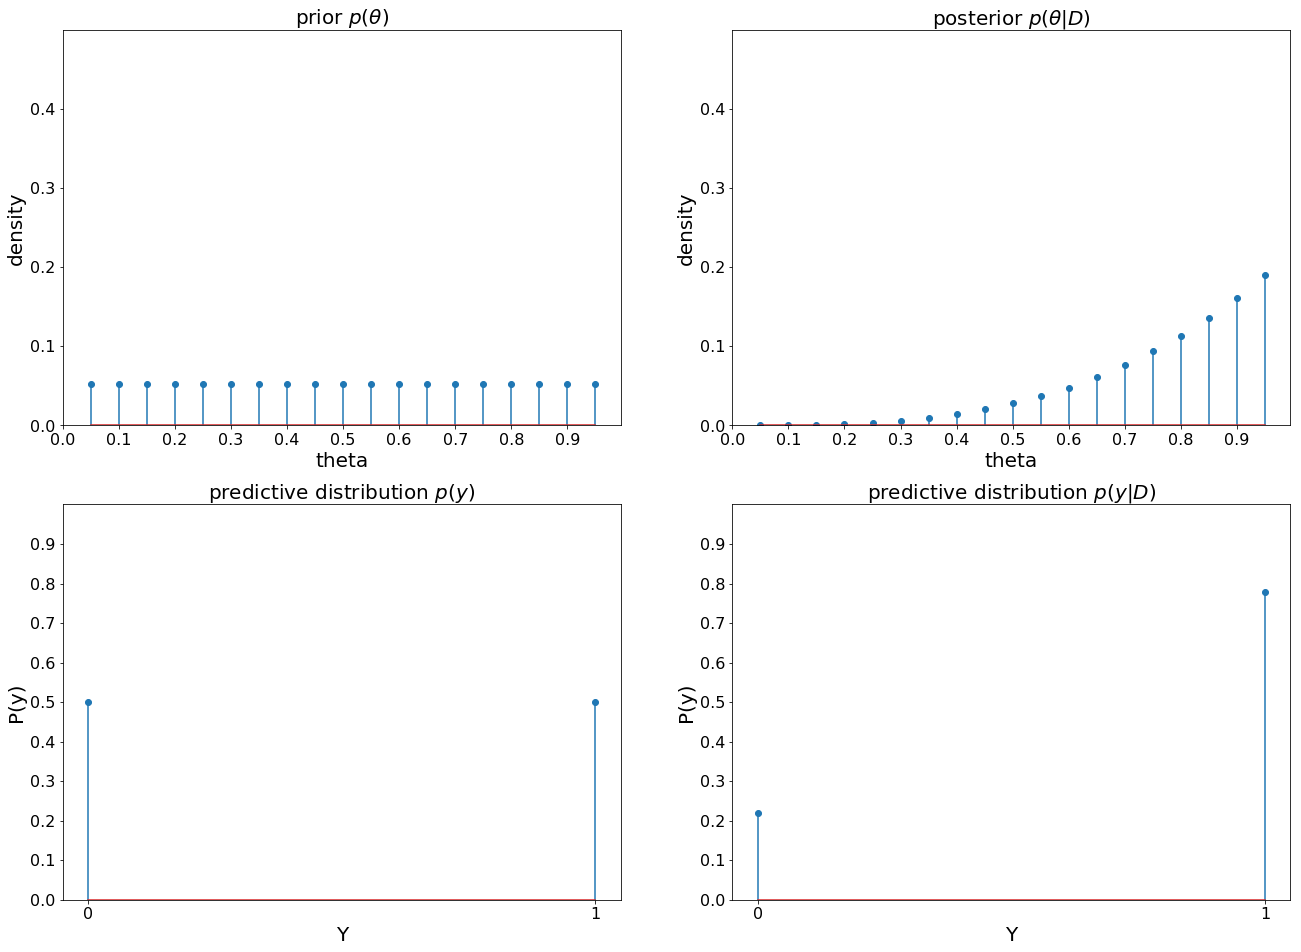

In [25]:
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
plt.stem(RES["theta"],RES["prior"])
plt.xlabel("theta",fontsize=20)
plt.ylabel("density",fontsize=20)
plt.ylim([0,0.5])
plt.title("prior " +r"$p(\theta)$",fontsize=20)
plt.xticks(np.arange(0,1,0.1),fontsize=16) 
plt.yticks(np.arange(0,0.5,0.1),fontsize=16) 
plt.subplot(2,2,2)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,0.5])
plt.xlabel("theta",fontsize=20)
plt.ylabel("density",fontsize=20)
plt.title("posterior " +r"$p(\theta|D)$",fontsize=20)
plt.xticks(np.arange(0,1,0.1),fontsize=16) 
plt.yticks(np.arange(0,0.5,0.1),fontsize=16) 

plt.subplot(2,2,3)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y",fontsize=20)
plt.ylabel("P(y)",fontsize=20)
plt.ylim([0,1])
plt.title("predictive distribution " +r"$p(y)$",fontsize=20)
plt.xticks([0,1],fontsize=16) 
plt.yticks(np.arange(0,1,0.1),fontsize=16) 

plt.subplot(2,2,4)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y",fontsize=20)
plt.ylabel("P(y)",fontsize=20)
plt.title("predictive distribution " +r"$p(y|D)$",fontsize=20)
plt.xticks([0,1],fontsize=16) 
plt.yticks(np.arange(0,1,0.1),fontsize=16) 
#plt.show()
plt.savefig("7.b2a.pdf")
from google.colab import files
files.download('7.b2a.pdf') 

In [0]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.22068421052631568, 0.7793157894736843]

### Posterior and the predictive distribution for different observed data

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

*Exercise 1: Let's assume fist you observed 40 times head and then you observed 11 times head and 9 times tail. How does the posterior and the predictive distribution look, for these two cases?*

In [0]:
# Write your code here

Scroll down to see the solution.

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

In [0]:
obs_data=np.repeat(1,40)
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  

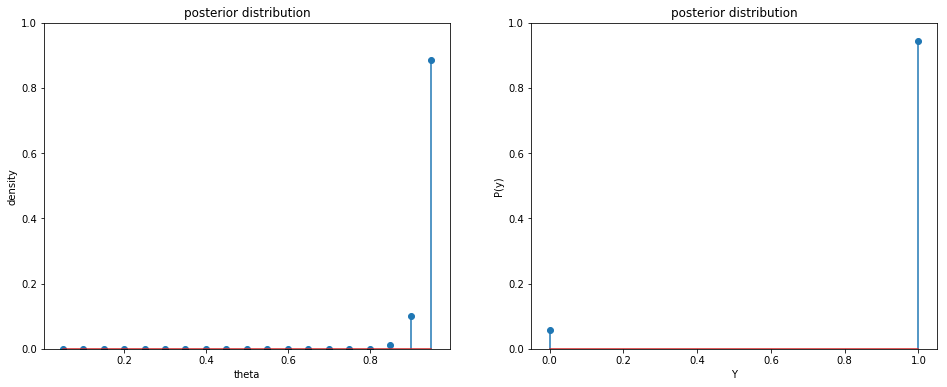

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [0]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.05628811827850312, 0.943711881721497]

In [0]:
obs_data=np.concatenate((np.repeat(1,11),np.repeat(0,9)))
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  

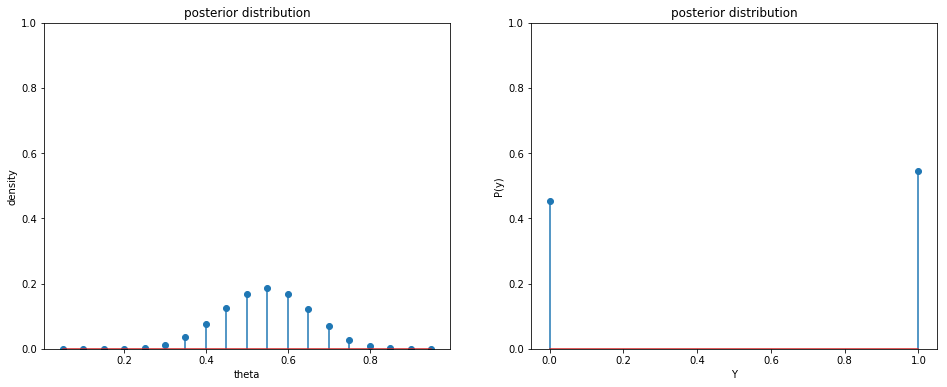

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [0]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.4545454551377407, 0.5454545448622592]

### Different prior

<img src="https://raw.githubusercontent.com/tensorchiefs/dl_book/master/imgs/paper-pen.png" width="60" align="left" />  

*Exercise 2: Let's now repeat the experiment with a non-uniform distributed prior. You will use a halfcircle as prior. With this prior calculate again the posterior when you fist observe 40 times head and then you observed 11 times head and 9 times tail. How does the posterior and the predictive distribution look with the new prior?*

In [0]:
prior=np.sqrt(np.square(0.5)-np.square(theta-0.5))-0.2
prior=prior/np.sum(prior)#normalzation

(0, 1)

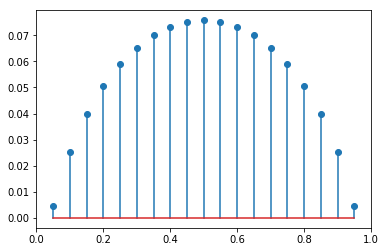

In [0]:
plt.stem(theta,prior)
plt.xlim([0,1])

Scroll down to see the solution.

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

In [0]:
obs_data=np.repeat(1,40)
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior[i],np.prod(dist.prob(obs_data))*prior[i]))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  
RES

,theta,jointlik,prior,unnorm_post,post
0,0.05,9.094947e-53,0.004530,4.120075e-55,4.030530e-52
1,0.10,1.000000e-40,0.025244,2.524426e-42,2.469561e-39
2,0.15,1.105733e-33,0.039652,4.384401e-35,4.289111e-32
3,0.20,1.099512e-28,0.050489,5.551273e-30,5.430622e-27
4,0.25,8.271806e-25,0.058822,4.865670e-26,4.759921e-23
5,0.30,1.215767e-21,0.065195,7.926217e-23,7.753950e-20
6,0.35,5.790576e-19,0.069919,4.048709e-20,3.960716e-17
7,0.40,1.208926e-16,0.073183,8.847234e-18,8.654950e-15
8,0.45,1.344313e-14,0.075100,1.009581e-15,9.876388e-13
9,0.50,9.094947e-13,0.075733,6.887857e-14,6.738158e-11


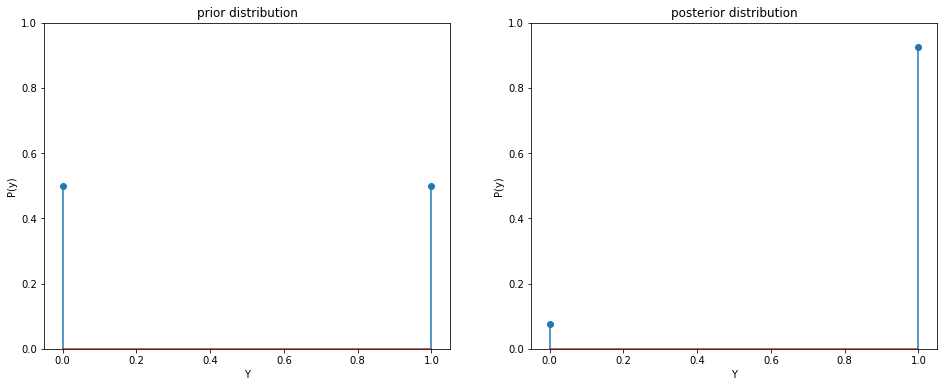

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()

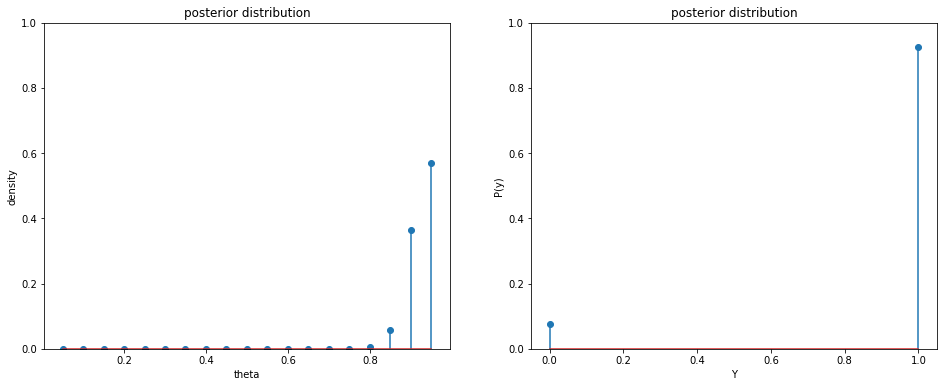

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [0]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.07518991759722617, 0.9248100824027736]

In [0]:
obs_data=np.concatenate((np.repeat(1,11),np.repeat(0,9)))
theta=np.arange(0.05,1,0.05)
RES=np.zeros((len(theta),5))
for i in range(0,len(theta)):
  dist = tfp.distributions.Bernoulli(probs=theta[i])   
  RES[i,0:4]=np.array((theta[i],np.prod(dist.prob(obs_data)),prior[i],np.prod(dist.prob(obs_data))*prior[i]))
RES=pd.DataFrame(RES,columns=["theta","jointlik","prior","unnorm_post","post"])
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])  
RES

,theta,jointlik,prior,unnorm_post,post
0,0.05,3.077390e-15,0.004530,1.394079e-17,3.397537e-11
1,0.10,3.874205e-12,0.025244,9.780145e-14,2.383538e-07
2,0.15,2.003430e-10,0.039652,7.943906e-12,1.936025e-05
3,0.20,2.748779e-09,0.050489,1.387818e-10,3.382278e-04
4,0.25,1.790158e-08,0.058822,1.053013e-09,2.566319e-03
5,0.30,7.148520e-08,0.065195,4.660494e-09,1.135818e-02
6,0.35,1.999718e-07,0.069919,1.398181e-08,3.407535e-02
7,0.40,4.226892e-07,0.073183,3.093350e-08,7.538862e-02
8,0.45,7.056703e-07,0.075100,5.299591e-08,1.291574e-01
9,0.50,9.536743e-07,0.075733,7.222442e-08,1.760195e-01


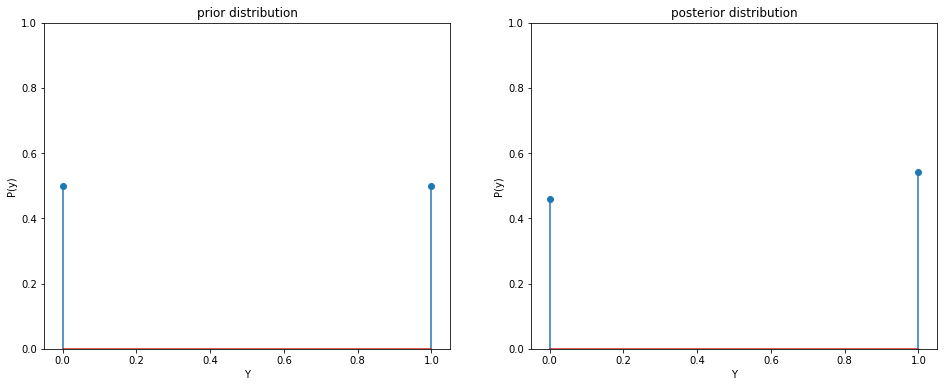

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["prior"]),np.sum((RES["theta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()

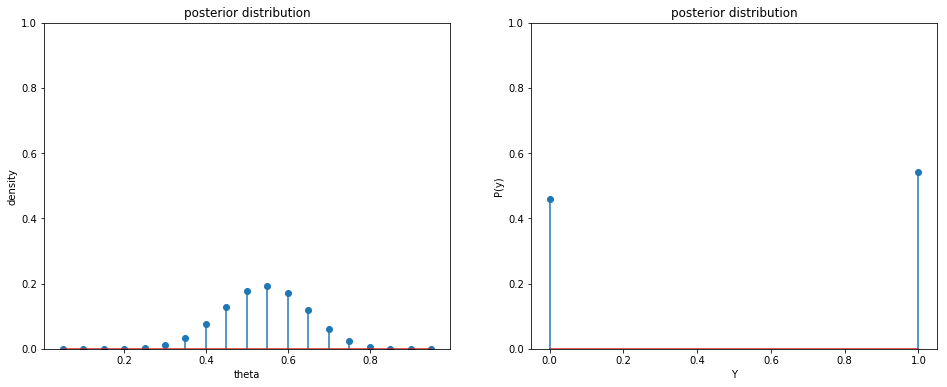

In [0]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["theta"],RES["post"])
plt.ylim([0,1])
plt.xlabel("theta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()


In [0]:
[np.sum((1-RES["theta"])*RES["post"]),np.sum((RES["theta"])*RES["post"])]

[0.4579006113490388, 0.5420993886509612]